# Meso scale analysis of echo chambers

In [131]:
import networkx as nx
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import warnings
import json
import numpy as np
import powerlaw
import cdlib
from cdlib import algorithms, evaluation, TemporalClustering, viz
import dynetx as dn
import random
import matplotlib.patches as mpatchesclassification
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap
from collections import OrderedDict
from tabulate import tabulate

from cdlib.classes.node_clustering import NodeClustering
%run Utilyties.ipynb
%run Communities_lib.ipynb

## Time-frames 

`Ranges` is a list of lists with the dates of a certain time-frame.
We use it to create the network snapshots to analyze the temporal evolution of meso scale echo chambers.

In [92]:
ranges = [
    ['2021-06-10', '2021-06-11', '2021-06-12', '2021-06-13', '2021-06-14'], # Italia - Turchia (1)
    ['2021-06-15', '2021-06-16', '2021-06-17', '2021-06-18', '2021-06-19'], # Italia - Svizzera (2)
    ['2021-06-20', '2021-06-21', '2021-06-22', '2021-06-23', '2021-06-24'], # Italia - Galles (3)
    ['2021-06-25', '2021-06-26', '2021-06-27', '2021-06-28', '2021-06-29'], # Italia - Austria (4)
    ['2021-06-30', '2021-07-01', '2021-07-02', '2021-07-03', '2021-07-04'], # Italia - Belgio (5)
    ['2021-07-05', '2021-07-06', '2021-07-07', '2021-07-08', '2021-07-09'], # Italia - Spagna (6)
    ['2021-07-10', '2021-07-11', '2021-07-12'],                             # Italia - Inghilterra (7)
]

snapshots = get_snapshot("../data/final/data_complete.json", ranges)

----

ENG: 

--- Network from: day 0 to day n - of the list in Ranges - (Time X) ---

Then we print the number of nodes in communities that meet the requirements to be considered echo chambers: 

Total number, total %, total number of proponents, % pros, total number of opponents, % cons.

----

--->	louvain	<---
--- Network dal: 2021-06-10 al 2021-06-14 (Tempo 1)--- 

Totale echo c: 33
% echo c: 42.308%
Totale pro: 26
% pro: 78.788%
Totale neutrale: 0
% pro: 0.0%
Totale contro: 7
% contro: 21.212%


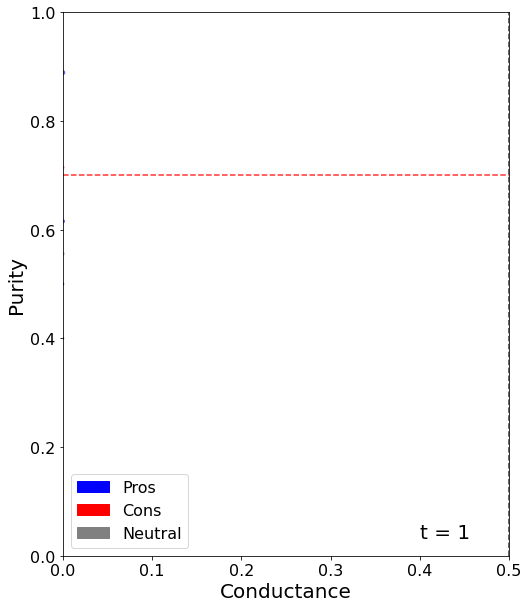

--- Network dal: 2021-06-15 al 2021-06-19 (Tempo 2)--- 

Totale echo c: 42
% echo c: 41.176%
Totale pro: 42
% pro: 100.0%
Totale neutrale: 0
% pro: 0.0%
Totale contro: 0
% contro: 0.0%


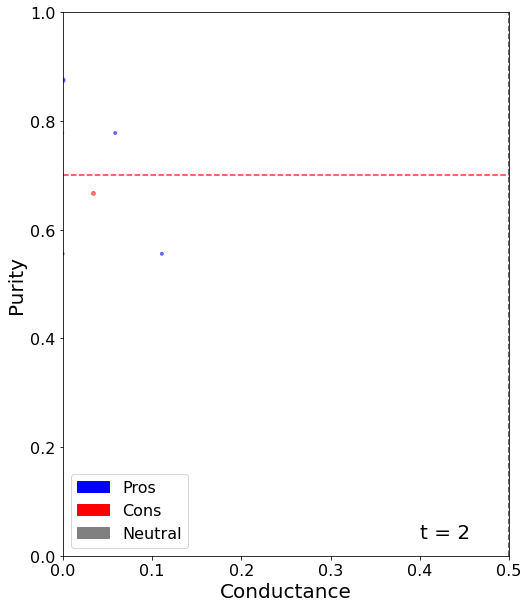

--- Network dal: 2021-06-20 al 2021-06-24 (Tempo 3)--- 

Totale echo c: 2257
% echo c: 66.894%
Totale pro: 1512
% pro: 66.992%
Totale neutrale: 0
% pro: 0.0%
Totale contro: 745
% contro: 33.008%


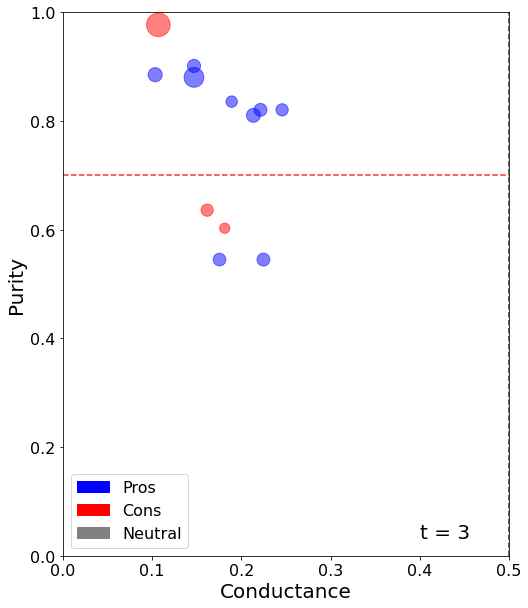

--- Network dal: 2021-06-25 al 2021-06-29 (Tempo 4)--- 

Totale echo c: 9633
% echo c: 67.213%
Totale pro: 5501
% pro: 57.106%
Totale neutrale: 264
% pro: 2.741%
Totale contro: 4132
% contro: 42.894%


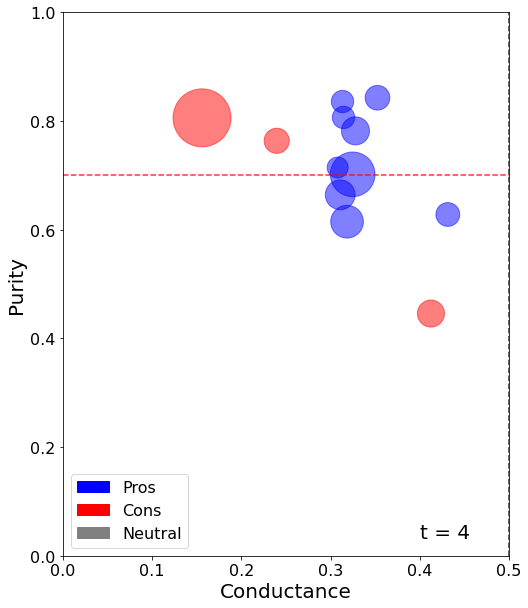

--- Network dal: 2021-06-30 al 2021-07-04 (Tempo 5)--- 

Totale echo c: 12392
% echo c: 81.996%
Totale pro: 7418
% pro: 59.861%
Totale neutrale: 274
% pro: 2.211%
Totale contro: 4974
% contro: 40.139%


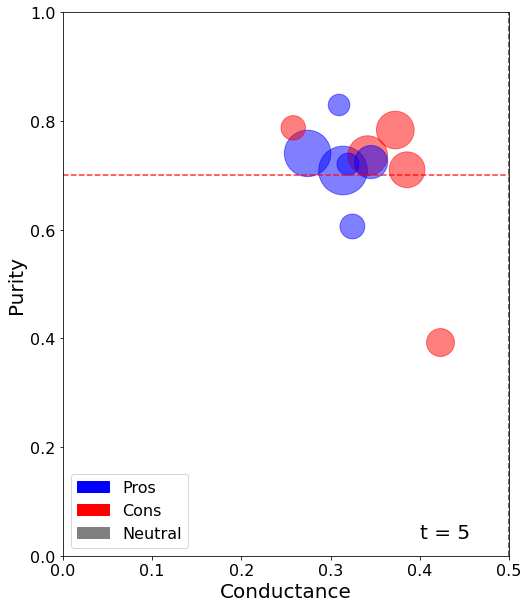

--- Network dal: 2021-07-05 al 2021-07-09 (Tempo 6)--- 

Totale echo c: 7601
% echo c: 50.092%
Totale pro: 3416
% pro: 44.941%
Totale neutrale: 324
% pro: 4.263%
Totale contro: 4185
% contro: 55.059%


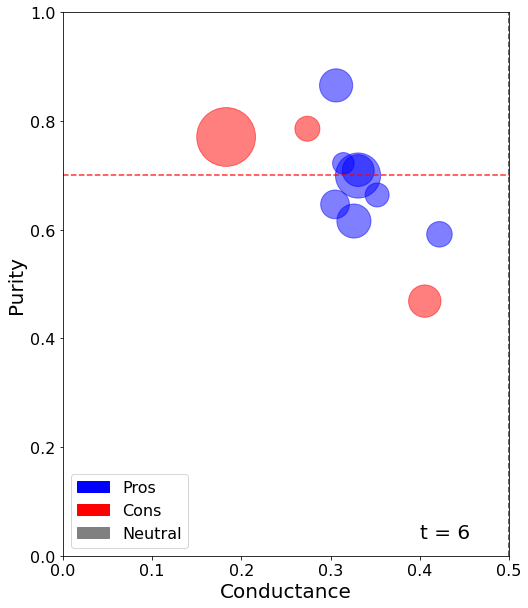

--- Network dal: 2021-07-10 al 2021-07-12 (Tempo 7)--- 

Totale echo c: 10900
% echo c: 70.88%
Totale pro: 6096
% pro: 55.927%
Totale neutrale: 240
% pro: 2.202%
Totale contro: 4804
% contro: 44.073%


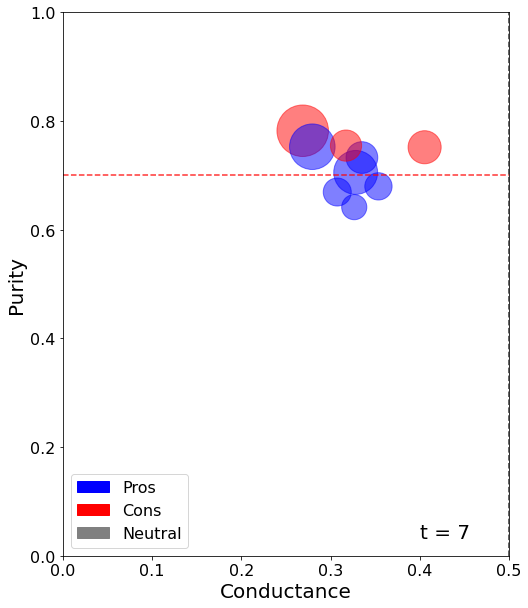

In [132]:
algorithm = "louvain"
G, matches, coms, coms_nodes, net_growth, time, tc = dynamic_network_communities(snapshots, ranges, algorithm)